In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

SA1 = gpd.read_file(r'.\gpd_shapefiles_2\Study_Area_1.shp')
SA2 = gpd.read_file(r'.\gpd_shapefiles_2\Study_Area_2.shp')
river = gpd.read_file(r'.\gpd_shapefiles_2\river.shp')

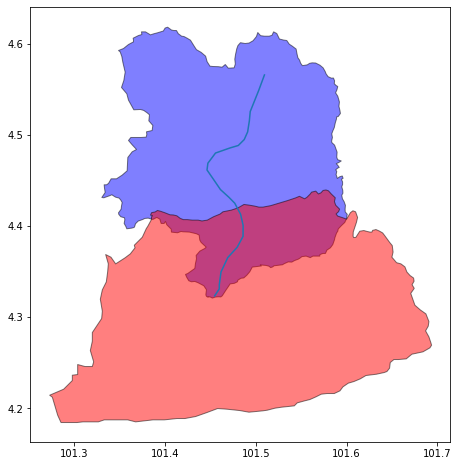

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
SA1.plot(ax = ax, color='blue',edgecolor='black',alpha=0.5)
SA2.plot(ax = ax, color='red',edgecolor='black',alpha=0.5)
river.plot(ax=ax)
plt.show()

## Intersections

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."


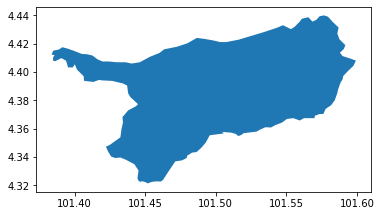

In [21]:
intersection = gpd.overlay(SA1,SA2, how='intersection')
intersection.plot()
intersection

## Union

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,None,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,None,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


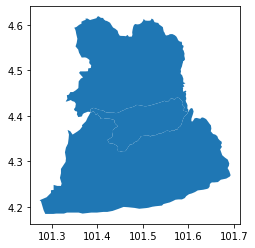

In [20]:
union = gpd.overlay(SA1,SA2, how='union')
union.plot()
union

## Symmetric Difference

,desc_1,desc_2,geometry
0,Study_Area_1,None,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
1,None,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


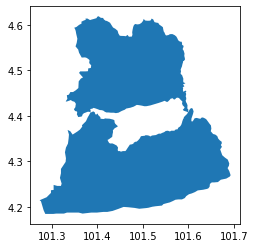

In [23]:
sd = gpd.overlay(SA1,SA2,how='symmetric_difference')
sd.plot()
sd

## Difference

,desc,geometry
0,Study_Area_1,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."


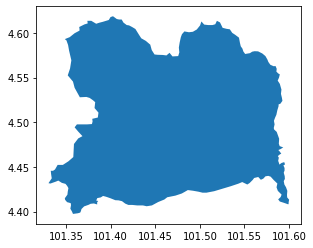

In [24]:
# This is SA1 - SA2

dif = gpd.overlay(SA1,SA2,how='difference')
dif.plot()
dif

,desc,geometry
0,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


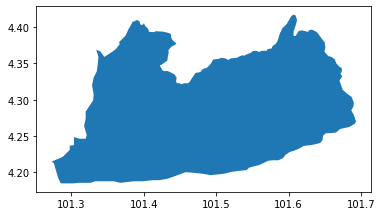

In [25]:
# This is SA2 - SA1

dif = gpd.overlay(SA2,SA1,how='difference')
dif.plot()
dif

## Dissolve

<AxesSubplot:>

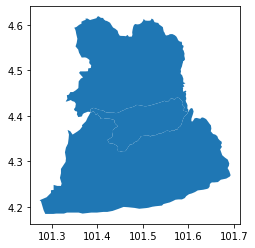

In [26]:
union = gpd.overlay(SA1,SA2,how='union')
union.plot()

dissolve can get rid of those lines in the middle that separate each study area

Need to have a common column to dissolve on though

In [30]:
union['common'] = 0
union

,desc_1,desc_2,geometry,common
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488...",0
1,Study_Area_1,None,"POLYGON ((101.38479 4.40801, 101.38112 4.40910...",0
2,None,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764...",0


,geometry,desc_1,desc_2
common,,,
0,"POLYGON ((101.59948 4.40801, 101.60370 4.41514...",Study_Area_1,Study_Area_2


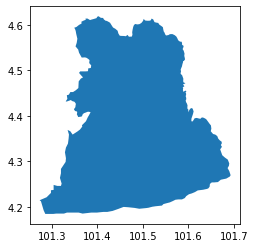

In [32]:
dissolve = union.dissolve(by='common')
dissolve.plot()
dissolve

## Buffer

In [34]:
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

To set a buffer with meters, we need to reproject the river to a coordinate system that uses meters

<AxesSubplot:>

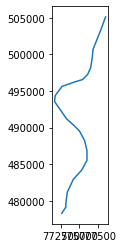

In [37]:
river_proj = river.to_crs(epsg=24547)
river_proj.plot()

<AxesSubplot:>

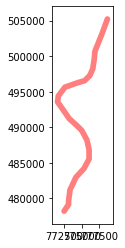

In [42]:
buffer_400m = river_proj['geometry'].buffer(distance=400)
buffer_400m.plot(color='red',alpha=0.5)

## Centroid

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,None,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,None,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


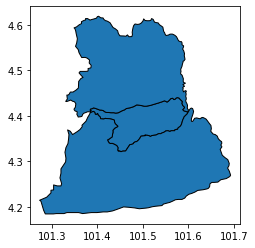

In [45]:
union = gpd.overlay(SA1,SA2,how='union')
union.plot(edgecolor='black')
union

C:\Users\Benja\AppData\Local\Temp/ipykernel_9620/1199915775.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = union['geometry'].centroid


<AxesSubplot:>

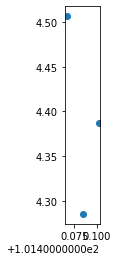

In [46]:
centroid = union['geometry'].centroid

centroid.plot()

<AxesSubplot:>

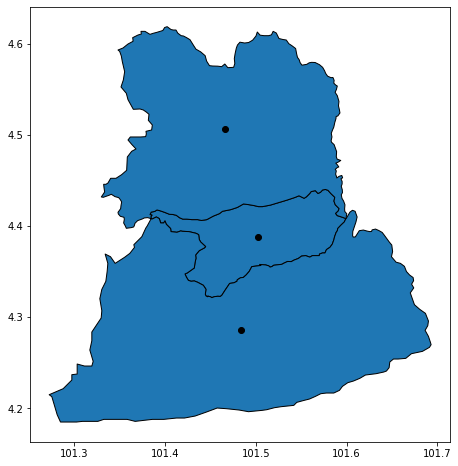

In [50]:
fig1,ax1 = plt.subplots(figsize=(10,8))
union.plot(ax=ax1,edgecolor='black')
centroid.plot(ax=ax1,color='black')

## XY Coordinates to Points

In [289]:
airports_data = pd.read_csv(r'.\gpd_shapefiles_2\us_airports.csv')
airports_data.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


In [290]:
geometry = [Point(xy) for xy in zip(airports['LONGITUDE'],airports['LATITUDE'])]
geometry[0:10]

Should get CRS from shapefile first

In [291]:
us_states = gpd.read_file(r'.\gpd_shapefiles_2\us_states.shp')

In [292]:
airports_us = gpd.GeoDataFrame(airports,geometry=geometry,crs=us_states.crs)

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry,state_name
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022),New Mexico
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432),Alaska
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044),Georgia
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453),Texas
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887),Connecticut


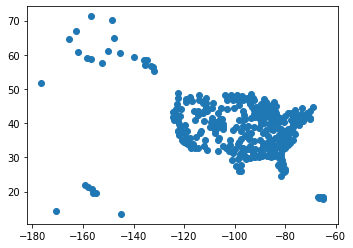

In [293]:
airports_us.plot()
airports_us.head()

In [294]:
len(airports_us['state_code'])

340

In [295]:
state_names_codes

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


## Attribute Joins

Make sure the column headings are the same

In [296]:
state_names_codes = pd.read_csv(r'.\gpd_shapefiles_2\state_names_codes.csv')
state_names_codes.head()

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [297]:
for i in range(len(state_names_codes)):
    code = state_names_codes['state_code'][i]
    code = code[0:2]
    
    state_names_codes['state_code'][i] = code

In [298]:
airports_us['state_name'] = ''

In [299]:
#join
for i in range(len(airports_us)):
    name = ''
    code = airports_us['state_code'][i]
    for x in range(len(state_names_codes)):
        code2 = state_names_codes['state_code'][x]
        if code == code2:
            name = state_names_codes['state_name'][x]
    airports_us['state_name'][i] = name

C:\Users\Benja\AppData\Local\Temp/ipykernel_9620/916347160.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airports_us['state_name'][i] = name


In [300]:
airports_us

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry,state_name
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022),New Mexico
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432),Alaska
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044),Georgia
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453),Texas
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887),Connecticut
...,...,...,...,...,...,...,...,...,...
335,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824,POINT (-132.36982 56.48433),Alaska
336,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638,POINT (-111.11764 44.68840),Montana
337,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811,POINT (-94.30681 36.28187),Arkansas
338,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226,POINT (-139.66023 59.50336),Alaska


## Spatial Joins

,NAME_1,geometry
0,Alabama,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
2,Arizona,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
3,Arkansas,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."
4,California,"MULTIPOLYGON (((-117.23285 32.77641, -117.2330..."


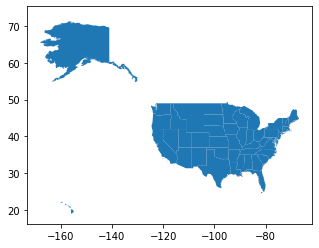

In [301]:
states.plot()
states.head()

<AxesSubplot:>

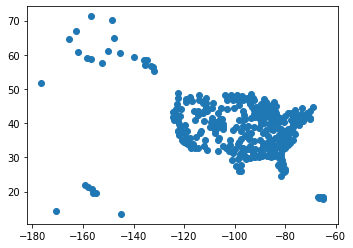

In [302]:
airports_us = airports_us[['AIRPORT','geometry']]
airports_us.plot()

<AxesSubplot:>

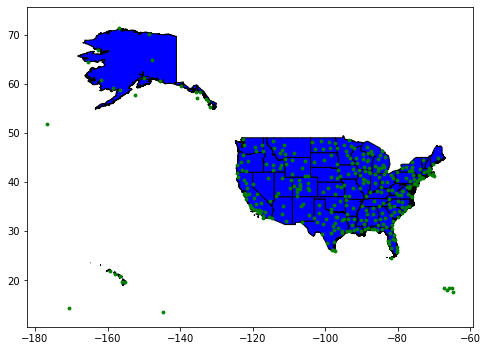

In [303]:
fig,ax = plt.subplots(figsize=(8,8))
states.plot(ax=ax,color='blue',edgecolor='black')
airports_us.plot(ax=ax,markersize=8,color='green')

In [305]:
airports_us = gpd.sjoin(airports_us,us_states,how= 'inner', op='intersects')

In [306]:
airports_us.head()

,AIRPORT,geometry,index_right,NAME_1
0,Albuquerque International,POINT (-106.60919 35.04022),31,New Mexico
196,Lea County Regional,POINT (-103.21703 32.68753),31,New Mexico
295,Roswell Industrial Air Center,POINT (-104.53056 33.30156),31,New Mexico
297,Santa Fe Municipal,POINT (-106.08814 35.61678),31,New Mexico
1,Ted Stevens Anchorage International,POINT (-149.99619 61.17432),1,Alaska
